# **Author: Sri Sudheera Chitipolu**

### *Github: https://github.com/sudheera96*

## Acquire the Data

Collected data from kaggle

*https://www.kaggle.com/hellbuoy/car-price-prediction*

## General Description: 
For understanding pricing dynamics of the new market in the different cars for business growth, we will predict the car’s prices depending on different independent variables. 

## Importing the dataset

In [2]:
import pandas as pd # imported pandas as pd
cp_data = pd.read_csv("carPrice_Assignment.csv") # pulled data from csv file to pandas dataframe
print(cp_data.keys()) # display a list of the names of the fields
cp_data.head(10) # table display of the first few lines in the DataFrame

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## _Notes_
In inital_exploration we have seen there are features with negative correlated with target variable. So we are droping them from data set

In [3]:
df = cp_data.drop(columns=["car_ID","CarName","highwaympg","citympg","peakrpm","symboling"])

In [4]:
df_num_cols = df.select_dtypes(exclude = 'object')
df_data = df_num_cols.drop(columns=["price"])

In [5]:
# statistics of the data
df_data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000


In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df_data)

# statistics of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00
25%,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01
50%,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01
75%,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01
max,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00


In [7]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3,4,5,6,7,8,9
0,-1.386110,2.185921,0.946319,1.762595,0.084355,-0.221135,-0.311814,-0.588308,0.587409,0.249501
1,-1.386110,2.185921,0.946319,1.762595,0.084355,-0.221135,-0.311814,-0.588308,0.587409,0.249501
2,-0.388314,1.020323,-1.412410,-0.679852,2.083102,1.047652,0.313275,-0.487898,-0.039371,0.173250
3,-0.238444,-0.463671,-0.316097,-0.561733,0.175414,-0.176228,0.344384,-0.047400,-0.055021,-0.350256
4,0.476462,0.171443,-0.288319,-0.809979,0.432943,0.195783,0.088632,-0.080545,0.093501,0.288461
...,...,...,...,...,...,...,...,...,...,...
200,2.791270,-0.503214,1.020994,-0.158389,-0.663794,-0.920575,0.010444,0.313460,-0.234759,-0.102841
201,3.207019,0.143216,1.047944,-0.238197,-0.488037,-0.474419,0.556908,0.064920,-0.718559,-0.226946
202,2.973264,-0.037048,1.521179,-0.033260,0.488336,-0.415441,-0.325456,0.367757,-0.268361,-0.271157
203,2.389742,-2.830901,-1.464809,1.297911,1.739609,-0.168377,0.168517,-0.326983,-0.313723,0.026341


After applying PCA, we got 10 Principal Components. It’s interesting to see how much variance each principal component captures.

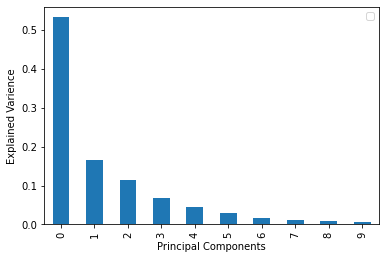

In [8]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

The first 5 Principal Components are capturing around 80% of the variance so we can replace the 10 original features with the new 5 features having 80% of the information. So, we have reduced the 10 dimensions to only 5 dimensions while retaining most of the information.

 

In [9]:
import numpy as np
d = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
d

6

So there 6 dimensions with varianace more than 95%

In [10]:
sum(pca.explained_variance_ratio_)

1.0000000000000002